In [1]:
import numpy as np
import pandas as pd
import os
from Discrete_Kalman_filter import Discrete_Kalman_filter
from datetime import date, datetime

In [2]:
dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

In [3]:
home_path = os.path.expanduser("~") + '/'
file_name = home_path + "data/cryptodatadownload/1-order.csv"
df = pd.read_csv(file_name)
date_fmt = '%Y-%m-%d %I-%p'
df.index = df['Date'].apply(lambda x: datetime.strptime(x, date_fmt))

In [4]:
measurements = df.Close.values
N = len(measurements)
kf = Discrete_Kalman_filter(F=F, H=H, Q=Q, R=R)
predictions = []

In [5]:
for z in measurements:
    predictions.append(np.dot(H, kf.predict())[0])
    kf.update(z)

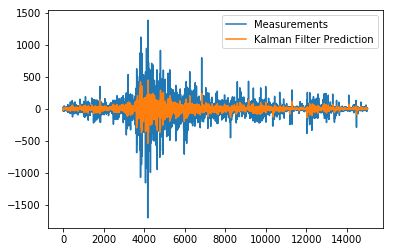

In [13]:
import matplotlib.pyplot as plt
predictions = np.reshape(np.array(predictions), newshape=-1)
# df.Close.plot(label='Measurements')
plt.plot(range(N), measurements, label='Measurements')
plt.plot(range(N), predictions, label='Kalman Filter Prediction')
plt.legend()
plt.show()

In [14]:
acc = np.sum((predictions * measurements) > 0)/N
print(acc)

0.45617423737844676
